# # Assignment 4: Phân loại văn bản
Tổng quan: Ở bài tập này chúng ta sẽ thực hành phân loại văn bản tin tức sử dụng Naive Bayes

In [1]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [2]:
len(twenty_train.data) + len(twenty_test.data)

18846

In [3]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
print("\n".join(twenty_train.data[0].split("\n")))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [5]:
twenty_train.target[0]

7

In [6]:
codings = list(range(len(twenty_train.target_names)))
target_dic = dict(zip(codings,twenty_train.target_names))

In [7]:
target_dic[twenty_train.target[0]]

'rec.autos'

## Câu 1: Tiền xử lý dữ liệu sử dụng Bag of Words và Tf-idf (sklearn)

In [6]:
#### YOUR CODE HERE ####
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(twenty_test.data)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

print(X_train_tfidf.shape)

print(X_train_tfidf[0])

#### END YOUR CODE #####

(11314, 130107)
  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (0, 56979)	0.057470154074851294
  (0, 51793)	0.13412921037839678
  (0, 51730)	0.09714744057976722
  (0, 50527)	0.0546142865885

In [89]:
X_test_counts = count_vect.fit(vocal_feature)

In [9]:
X_test_counts.shape

(7532, 130107)

In [ ]:
X_train_tfidf.shape
X_test_tfidf.shape

## Câu 2: Sử dụng mô hình Naive Bayes cơ bản cho phân loại tin tức, đánh giá mô hình

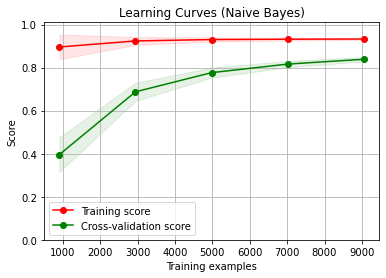

In [7]:
#### YOUR CODE HERE ####
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  
  """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
  
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

  plt.legend(loc="best")
  return plt

estimator = MultinomialNB()
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X, y = X_train_tfidf, twenty_train.target
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.01), cv=cv, n_jobs=8)

plt.show()



#### END YOUR CODE #####

Accuracy:  0.7738980350504514


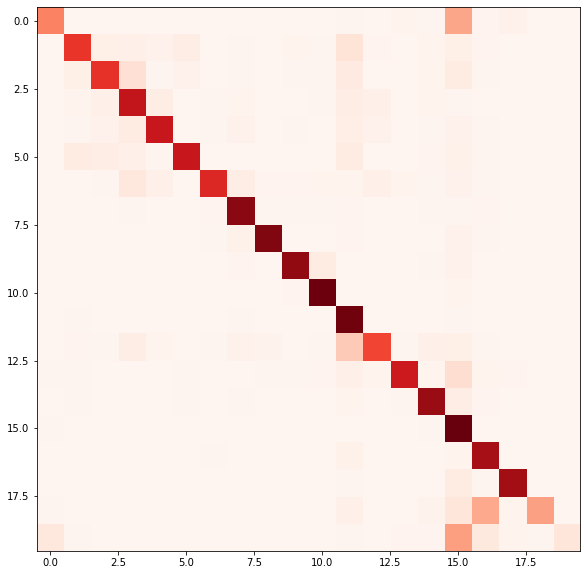

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

In [11]:
import numpy as np

predicted = estimator.predict(X_test_tfidf)
print("Accuracy: ", np.mean(predicted == twenty_test.target))
estimator = MultinomialNB()
estimator = estimator.fit(X_train_tfidf, twenty_train.target)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(twenty_test.target, predicted)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap="Reds")
plt.show()
print(cm)

## Câu hỏi 3 (nâng cao): Sử dụng Scikit-learn Pipelines để kết hợp quá trình (huấn luyện đồng thời) tiền xử lý dữ liệu và Naive Bayes

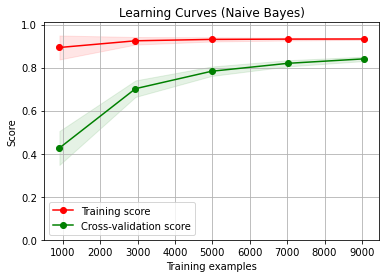

In [79]:
#### YOUR CODE HERE ####
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(text_clf, title, twenty_train.data , twenty_train.target, ylim=(0.0, 1.01), cv=cv, n_jobs=8)
plt.show()

#### END YOUR CODE #####

## Câu 4 (nâng cao): Cải tiến mô hình ở câu 3 bằng cách loại bỏ những từ thông dụng và sử dụng GridSearchCV

In [12]:
#### YOUR CODE HERE ####
# NLTK
# Removing stop words
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

print(gs_clf.best_score_)
print(gs_clf.best_params_)

#### END YOUR CODE #####

0.9129399133330441
{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}
